# Active Brownian Particles


In [36]:
# Import
from os import lstat
import matplotlib.pyplot as plt
import numpy as np
import math

In [37]:
# Load files
par = open("parameters.txt")
dynamics = np.loadtxt("dynamics.txt")
bool_dynamics = np.loadtxt("bool_dynamics.txt")

# Create parameter dictionsry
par_dict = {}
for line in par:
    key, value = line.split()
    par_dict[key] = float(value)

# Take x and y positions
x_dyn = dynamics[:,0]
y_dyn = dynamics[:,1]

# Take start and finish points
x_start = x_dyn[0]
y_start = y_dyn[0]
x_end = x_dyn[-1]
y_end = y_dyn[-1]

# compute maximum
x_max = max(x_dyn)
x_min = min(x_dyn)
y_max = max(y_dyn)
y_min = min(y_dyn)

print(x_max, x_min, y_max, y_min)
L = par_dict["L"]

0.125 -0.124999 0.12499 -0.124999


## Potential plot

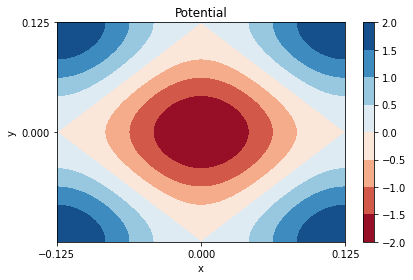

In [38]:
### Contour plot of potential
# Define potential function
def potential(x, y):
    return par_dict["k"]*(np.sin(8*math.pi*(x +3./16.*par_dict["L"])/par_dict["L"]) + np.sin(8*math.pi*(y+3./16.*par_dict["L"])/par_dict["L"]))

# Mesh grid
x = np.linspace(-L/8, L/8, 1000)
y = np.linspace(-L/8, L/8, 1000)
xx, yy = np.meshgrid(x, y)

# Potential
zz = potential(xx,yy)

# Plot
cf = plt.contourf(xx,yy, zz, cmap ="RdBu")
plt.colorbar()

# Rendering
plt.title("Potential")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks([-L/8, 0, L/8 ])
plt.yticks([ 0, L/8  ])
#plt.legend()
plt.tight_layout()
plt.savefig("potential.png")

## Transition probability density

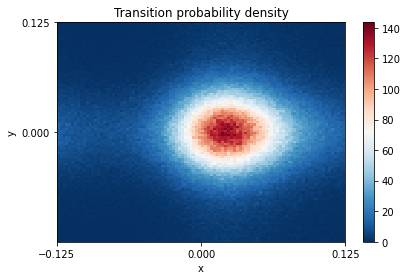

In [39]:
### Plotting
# Contourf and dynamics

h = plt.hist2d(x_dyn, y_dyn, bins = 100, density = True)
plt.colorbar()
#plt.plot(x_start, y_start, c = "blue", marker = "o", ms = 10, ls  = "",label = "Start" )
#plt.plot(x_end, y_end, c = "red", marker = "o", ms = 10, ls  = "",label = "End" )

# Rendering
plt.title("Transition probability density")
plt.xlabel("x")
plt.ylabel("y")
plt.xticks([-L/8, 0, L/8 ])
plt.yticks([ 0, L/8  ])
#plt.legend()
plt.tight_layout()
plt.savefig("prob_density.png")


## Transition times

In [40]:
# Masks
mask_in_reactant = bool_dynamics == 0
mask_outside = bool_dynamics ==1
mask_in_target = bool_dynamics == 2


mask_in_target[0]

False